In [33]:
import os

# Adjust the path if it's inside a subfolder
dataset_path = './data_pattern'

# List files to verify
print(os.listdir(dataset_path))


['animal', 'cartoon', 'floral', 'geometry', 'ikat', 'plain', 'polka dot', 'squares', 'stripes', 'tribal']


In [34]:
import pandas as pd
import numpy as np
from numpy import random
import os
import matplotlib.pyplot as plt

In [35]:
import os

def read_data(folder):
    """
    Reads data from the specified folder and returns labels and paths.
    Assumes each subfolder in the folder represents a class.
    """
    labels = []
    paths = []
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                if os.path.isfile(file_path):
                    labels.append(class_folder)
                    paths.append(file_path)
    return labels, paths

folder = './data_pattern'
labels, paths = read_data(folder)

print(f"Found {len(paths)} images in {len(set(labels))} classes.")
print("Example:", labels[0], paths[0])

Found 4230 images in 10 classes.
Example: animal ./data_pattern\animal\3280.jpg


In [37]:
import os

def read_data(folder):
    labels, paths = [], []
    
    # Automatically detect subfolders = class labels
    class_folders = os.listdir(folder)
    
    for class_name in class_folders:
        class_path = os.path.join(folder, class_name)
        
        if not os.path.isdir(class_path):
            continue  # skip files
        
        # List files in the class folder
        image_files = os.listdir(class_path)
        
        for image_file in sorted(image_files):
            image_path = os.path.join(class_path, image_file)
            if os.path.isfile(image_path):
                labels.append(class_name)
                paths.append(image_path)
                
    return labels, paths


In [38]:
all_labels, all_paths = read_data(folder)

In [39]:
import os
import pandas as pd

# Get all image paths and labels from directory
all_paths = []
all_labels = []

# Walk through the dataset directory
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Get the full path
            path = os.path.join(root, file)
            # Get the label from the parent directory name
            label = os.path.basename(os.path.dirname(path))
            
            all_paths.append(path)
            all_labels.append(label)

# Create DataFrame
df = pd.DataFrame({
    'path': all_paths,
    'label': all_labels
})

print(f"Found {len(all_paths)} images in {len(set(all_labels))} classes")

Found 4230 images in 10 classes


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is loaded from somewhere, if not, load it first
# df = pd.read_csv('your_data.csv')  # Uncomment and modify if needed

train_df, dummy_df = train_test_split(
    df, 
    train_size=0.8, 
    random_state=123, 
    shuffle=True, 
    stratify=df['label']
)

valid_df, test_df = train_test_split(
    dummy_df, 
    train_size=0.5, 
    random_state=123, 
    shuffle=True, 
    stratify=dummy_df['label']
)

print("Train dataset:", len(train_df), 
      "Test dataset:", len(test_df), 
      "Validation dataset:", len(valid_df))

train_balance = train_df['label'].value_counts()
print('Train dataset value count:\n', train_df['label'].value_counts())

Train dataset: 3384 Test dataset: 423 Validation dataset: 423
Train dataset value count:
 label
stripes      400
polka dot    398
plain        398
tribal       397
floral       396
squares      351
ikat         284
animal       281
geometry     271
cartoon      208
Name: count, dtype: int64


In [41]:
directory = '/content/raw_data'

In [42]:
# The directory variable was set to a path that doesn't exist.
# Based on previous steps, the data is located in the mounted Google Drive.
# Update the directory variable to point to the correct path.
labels = os.listdir(dataset_path)

In [43]:
labels.sort()

In [32]:
import plotly.express as px

In [44]:
px.histogram(train_df, x='label', title='Distribution of Labels in Training Dataset')

In [54]:
import cv2
import numpy as np
import pandas as pd

In [53]:
def apply_transform(image):
# Rotate (random angle between -40 and 40 degrees)
  angle = np.random.uniform(-40, 40)
  rows, cols = image.shape[:2]
  M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
  image = cv2.warpAffine(image, M, (cols, rows))
# Horizontal Flip
  if np.random.rand() < 0.5:
    image = cv2.flip(image, 1)
# Vertical Flip
  if np.random.rand() < 0.5:
    image = cv2.flip(image, 0)
# Random Brightness and Contrast
  alpha = 1.0 + np.random.uniform(-0.2, 0.2)
# Brightness
  beta = 0.0 + np.random.uniform(-0.2, 0.2)
# Contrast
  image = cv2.convertScaleAbs (image, alpha=alpha, beta=beta)
# Random Gamma Correction
  gamma = np.random.uniform (0.8, 1.2)
  image = np.clip((image / 255.0)**gamma, 0, 1) * 255.0

  return image

In [51]:
def apply_augmentation (image_path, label):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  augmented_image = apply_transform(image=image)
  return augmented_image, label

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
gen=ImageDataGenerator()

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator (rescale=1./255)

In [57]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dataset path and get image paths and labels
dataset_path = 'path/to/your/dataset'  # Replace with your actual path
# Use existing variables all_paths and all_labels
paths = all_paths
labels = all_labels

# Verify lengths match
print(f"Number of paths: {len(paths)}")
print(f"Number of labels: {len(labels)}")

# Create the data generator
gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create DataFrame after verifying data
train_df = pd.DataFrame({
    'path': paths,
    'label': labels
})

# Create the training generator
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

print(f"Found {len(paths)} images in {len(set(labels))} classes")

Number of paths: 4230
Number of labels: 4230
Found 4230 validated image filenames belonging to 10 classes.
Found 4230 images in 10 classes


In [58]:
valid_df = pd.DataFrame({
    'path': paths,  # List of image paths
    'label': labels  # List of corresponding labels
})

valid_gen=gen.flow_from_dataframe(valid_df, x_col='path', y_col='label', target_size=(255, 255), seed=123,
class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=32)

Found 4230 validated image filenames belonging to 10 classes.


In [59]:
test_df = pd.DataFrame({
    'path': paths,  # List of image paths
    'label': labels  # List of corresponding labels
})

test_gen=gen.flow_from_dataframe(test_df, x_col='path', y_col='label', target_size=(255, 255), seed=123,
class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=32)

Found 4230 validated image filenames belonging to 10 classes.


In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras import regularizers
from keras.models import Model
from keras.optimizers import Adam, Adamax
import tensorflow as tf

In [61]:
model=Sequential()
model.add(Convolution2D(filters=32, kernel_size=3, padding='same', activation="relu",
input_shape=(255, 255, 3)))
model.add(MaxPooling2D (strides=2, pool_size=2, padding= "valid"))
model.add(Convolution2D (filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D (strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))
model.add(Convolution2D (filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D (strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense (128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense (10, activation='softmax')) # Changed from 9 to 10 units

C:\Users\bpk12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [62]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath="model_cnn.h5",
monitor='val_accuracy',
mode='max',
save_best_only=True,
verbose=1)

In [63]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [45]:
history_con = model.fit(x=train_gen, epochs=40, verbose=1, validation_data=valid_gen,
validation_steps=None, shuffle=True, callbacks=[model_checkpoint_callback])

C:\Users\bpk12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.1008 - loss: 2.8302
Epoch 1: val_accuracy improved from -inf to 0.11820, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 100s 893ms/step - accuracy: 0.1009 - loss: 2.8266 - val_accuracy: 0.1182 - val_loss: 2.2909
Epoch 2/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.1350 - loss: 2.2869
Epoch 2: val_accuracy improved from 0.11820 to 0.15839, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 440ms/step - accuracy: 0.1350 - loss: 2.2868 - val_accuracy: 0.1584 - val_loss: 2.2692
Epoch 3/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.1584 - loss: 2.2762
Epoch 3: val_accuracy improved from 0.15839 to 0.18913, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 446ms/step - accuracy: 0.1585 - loss: 2.2761 - val_accuracy: 0.1891 - val_loss: 2.2633
Epoch 4/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.1731 - loss: 2.2432
Epoch 4: val_accuracy did not improve from 0.18913
106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 440ms/step - accuracy: 0.1732 - loss: 2.2430 - val_accuracy: 0.1820 - val_loss: 2.2279
Epoch 5/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.1626 - loss: 2.2134
Epoch 5: val_accuracy did not improve from 0.18913
106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 441ms/step - accuracy: 0.1626 - loss: 2.2134 - val_accuracy: 0.1773 - val_loss: 2.2387
Epoch 6/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.1871 - loss: 2.1925
Epoch 6: val_accuracy improved from 0.18913 to 0.21749, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 440ms/step - accuracy: 0.1871 - loss: 2.1924 - val_accuracy: 0.2175 - val_loss: 2.2191
Epoch 7/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.2174 - loss: 2.1354
Epoch 7: val_accuracy improved from 0.21749 to 0.21986, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 439ms/step - accuracy: 0.2174 - loss: 2.1355 - val_accuracy: 0.2199 - val_loss: 2.1779
Epoch 8/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.2163 - loss: 2.1223
Epoch 8: val_accuracy did not improve from 0.21986
106/106 ━━━━━━━━━━━━━━━━━━━━ 46s 437ms/step - accuracy: 0.2163 - loss: 2.1224 - val_accuracy: 0.2199 - val_loss: 2.1535
Epoch 9/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.2134 - loss: 2.1112
Epoch 9: val_accuracy improved from 0.21986 to 0.22459, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 438ms/step - accuracy: 0.2134 - loss: 2.1113 - val_accuracy: 0.2246 - val_loss: 2.1700
Epoch 10/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.2376 - loss: 2.0906
Epoch 10: val_accuracy improved from 0.22459 to 0.24586, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 441ms/step - accuracy: 0.2376 - loss: 2.0906 - val_accuracy: 0.2459 - val_loss: 2.1578
Epoch 11/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.2469 - loss: 2.0659
Epoch 11: val_accuracy did not improve from 0.24586
106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 446ms/step - accuracy: 0.2468 - loss: 2.0659 - val_accuracy: 0.2199 - val_loss: 2.1246
Epoch 12/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2527 - loss: 2.0366
Epoch 12: val_accuracy improved from 0.24586 to 0.24823, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 52s 492ms/step - accuracy: 0.2528 - loss: 2.0366 - val_accuracy: 0.2482 - val_loss: 2.1307
Epoch 13/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.2682 - loss: 2.0012
Epoch 13: val_accuracy improved from 0.24823 to 0.25768, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 54s 507ms/step - accuracy: 0.2682 - loss: 2.0011 - val_accuracy: 0.2577 - val_loss: 2.1143
Epoch 14/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.2551 - loss: 1.9834
Epoch 14: val_accuracy did not improve from 0.25768
106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 444ms/step - accuracy: 0.2551 - loss: 1.9834 - val_accuracy: 0.2199 - val_loss: 2.1116
Epoch 15/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.2880 - loss: 1.9535
Epoch 15: val_accuracy improved from 0.25768 to 0.26241, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 496ms/step - accuracy: 0.2879 - loss: 1.9536 - val_accuracy: 0.2624 - val_loss: 2.0732
Epoch 16/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.2939 - loss: 1.9165
Epoch 16: val_accuracy did not improve from 0.26241
106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 503ms/step - accuracy: 0.2939 - loss: 1.9166 - val_accuracy: 0.2293 - val_loss: 2.1275
Epoch 17/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2889 - loss: 1.9008
Epoch 17: val_accuracy did not improve from 0.26241
106/106 ━━━━━━━━━━━━━━━━━━━━ 52s 488ms/step - accuracy: 0.2889 - loss: 1.9009 - val_accuracy: 0.2530 - val_loss: 2.0941
Epoch 18/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.2869 - loss: 1.9241
Epoch 18: val_accuracy did not improve from 0.26241
106/106 ━━━━━━━━━━━━━━━━━━━━ 55s 514ms/step - accuracy: 0.2870 - loss: 1.9241 - val_accuracy: 0.2482 - val_loss: 2.1036
Epoch 19/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.3149 - loss: 1.8687
Epoch 19

106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 495ms/step - accuracy: 0.3642 - loss: 1.7508 - val_accuracy: 0.2648 - val_loss: 2.1686
Epoch 32/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.3662 - loss: 1.7037
Epoch 32: val_accuracy did not improve from 0.26478
106/106 ━━━━━━━━━━━━━━━━━━━━ 52s 488ms/step - accuracy: 0.3663 - loss: 1.7037 - val_accuracy: 0.2530 - val_loss: 2.2132
Epoch 33/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.3637 - loss: 1.7045
Epoch 33: val_accuracy improved from 0.26478 to 0.27423, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 54s 511ms/step - accuracy: 0.3637 - loss: 1.7046 - val_accuracy: 0.2742 - val_loss: 2.1311
Epoch 34/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.3813 - loss: 1.6629
Epoch 34: val_accuracy did not improve from 0.27423
106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 494ms/step - accuracy: 0.3814 - loss: 1.6629 - val_accuracy: 0.2530 - val_loss: 2.1923
Epoch 35/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.3796 - loss: 1.6622
Epoch 35: val_accuracy did not improve from 0.27423
106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 499ms/step - accuracy: 0.3795 - loss: 1.6625 - val_accuracy: 0.2648 - val_loss: 2.2084
Epoch 36/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.3650 - loss: 1.6693
Epoch 36: val_accuracy improved from 0.27423 to 0.27896, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 55s 518ms/step - accuracy: 0.3650 - loss: 1.6695 - val_accuracy: 0.2790 - val_loss: 2.1965
Epoch 37/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.3754 - loss: 1.6733
Epoch 37: val_accuracy did not improve from 0.27896
106/106 ━━━━━━━━━━━━━━━━━━━━ 52s 492ms/step - accuracy: 0.3754 - loss: 1.6732 - val_accuracy: 0.2364 - val_loss: 2.2893
Epoch 38/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.3932 - loss: 1.6411
Epoch 38: val_accuracy did not improve from 0.27896
106/106 ━━━━━━━━━━━━━━━━━━━━ 54s 508ms/step - accuracy: 0.3932 - loss: 1.6411 - val_accuracy: 0.2482 - val_loss: 2.1904
Epoch 39/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.3925 - loss: 1.6571
Epoch 39: val_accuracy did not improve from 0.27896
106/106 ━━━━━━━━━━━━━━━━━━━━ 55s 520ms/step - accuracy: 0.3925 - loss: 1.6572 - val_accuracy: 0.2766 - val_loss: 2.2038
Epoch 40/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.3874 - loss: 1.6274
Epoch 40

In [64]:
base_model=tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(255,255,3))
print('Created ResNet50 model')

Created ResNet50 model


In [65]:
for layer in base_model.layers:
  layer.trainable = False

In [66]:
for layer in base_model.layers[173:]:
  layer.trainable = True

In [67]:
x1 = base_model.output
#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [68]:
# adding extra layers
x3 = tf.keras.layers. Dense (1024, activation='relu', kernel_initializer= "he_uniform")(x2)
x4 = tf.keras.layers.Dropout (0.4) (x3)
x5= tf.keras.layers. Dense (512, activation='relu', kernel_initializer= "he_uniform")(x4)

In [69]:
#Add output layer
prediction = tf.keras.layers.Dense (10, activation='softmax') (x5) # Changed from 7 to 10 units

In [71]:
final_model = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
outputs=prediction)

In [73]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model_checkpoint_callback_rs = tf.keras.callbacks. ModelCheckpoint (
filepath="model_50.h5",
monitor='val_accuracy',
mode='max',
save_best_only=True,
verbose=1)

In [75]:
history_resnet = final_model.fit (train_gen,
epochs = 20,
validation_data = valid_gen, callbacks=[model_checkpoint_callback_rs])

C:\Users\bpk12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1293 - loss: 2.6749
Epoch 1: val_accuracy improved from -inf to 0.18085, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 587s 4s/step - accuracy: 0.1294 - loss: 2.6728 - val_accuracy: 0.1809 - val_loss: 2.2167
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1747 - loss: 2.2323
Epoch 2: val_accuracy improved from 0.18085 to 0.21868, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 524s 4s/step - accuracy: 0.1746 - loss: 2.2323 - val_accuracy: 0.2187 - val_loss: 2.1855
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1760 - loss: 2.2018
Epoch 3: val_accuracy improved from 0.21868 to 0.22388, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 514s 4s/step - accuracy: 0.1761 - loss: 2.2018 - val_accuracy: 0.2239 - val_loss: 2.1605
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2126 - loss: 2.1580
Epoch 4: val_accuracy improved from 0.22388 to 0.23546, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 512s 4s/step - accuracy: 0.2126 - loss: 2.1581 - val_accuracy: 0.2355 - val_loss: 2.1486
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2263 - loss: 2.1558
Epoch 5: val_accuracy improved from 0.23546 to 0.24066, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 506s 4s/step - accuracy: 0.2262 - loss: 2.1558 - val_accuracy: 0.2407 - val_loss: 2.1236
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2150 - loss: 2.1504
Epoch 6: val_accuracy improved from 0.24066 to 0.26028, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 518s 4s/step - accuracy: 0.2150 - loss: 2.1504 - val_accuracy: 0.2603 - val_loss: 2.1042
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2217 - loss: 2.1467
Epoch 7: val_accuracy improved from 0.26028 to 0.26596, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 527s 4s/step - accuracy: 0.2217 - loss: 2.1467 - val_accuracy: 0.2660 - val_loss: 2.0902
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2335 - loss: 2.1182
Epoch 8: val_accuracy did not improve from 0.26596
133/133 ━━━━━━━━━━━━━━━━━━━━ 511s 4s/step - accuracy: 0.2334 - loss: 2.1184 - val_accuracy: 0.2626 - val_loss: 2.1091
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2259 - loss: 2.1396
Epoch 9: val_accuracy did not improve from 0.26596
133/133 ━━━━━━━━━━━━━━━━━━━━ 515s 4s/step - accuracy: 0.2259 - loss: 2.1395 - val_accuracy: 0.2492 - val_loss: 2.0968
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2318 - loss: 2.1260
Epoch 10: val_accuracy did not improve from 0.26596
133/133 ━━━━━━━━━━━━━━━━━━━━ 516s 4s/step - accuracy: 0.2318 - loss: 2.1260 - val_accuracy: 0.2553 - val_loss: 2.0707
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2468 - loss: 2.1032
Epoch 11: val_accuracy improved 

133/133 ━━━━━━━━━━━━━━━━━━━━ 557s 4s/step - accuracy: 0.2467 - loss: 2.1032 - val_accuracy: 0.2801 - val_loss: 2.0611
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2325 - loss: 2.1065
Epoch 12: val_accuracy did not improve from 0.28014
133/133 ━━━━━━━━━━━━━━━━━━━━ 581s 4s/step - accuracy: 0.2325 - loss: 2.1066 - val_accuracy: 0.2655 - val_loss: 2.0478
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2304 - loss: 2.1064
Epoch 13: val_accuracy improved from 0.28014 to 0.29149, saving model to model_50.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 593s 4s/step - accuracy: 0.2305 - loss: 2.1065 - val_accuracy: 0.2915 - val_loss: 2.0441
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2430 - loss: 2.0887
Epoch 14: val_accuracy did not improve from 0.29149
133/133 ━━━━━━━━━━━━━━━━━━━━ 596s 4s/step - accuracy: 0.2430 - loss: 2.0888 - val_accuracy: 0.2823 - val_loss: 2.0305
Epoch 15/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2383 - loss: 2.0880
Epoch 15: val_accuracy did not improve from 0.29149
133/133 ━━━━━━━━━━━━━━━━━━━━ 593s 4s/step - accuracy: 0.2383 - loss: 2.0881 - val_accuracy: 0.2804 - val_loss: 2.0469
Epoch 16/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2156 - loss: 2.1370
Epoch 16: val_accuracy did not improve from 0.29149
133/133 ━━━━━━━━━━━━━━━━━━━━ 591s 4s/step - accuracy: 0.2157 - loss: 2.1368 - val_accuracy: 0.2898 - val_loss: 2.0259
Epoch 17/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2366 - loss: 2.1235
Epoch 17: val_accuracy did n

In [76]:
import matplotlib.pyplot as plt

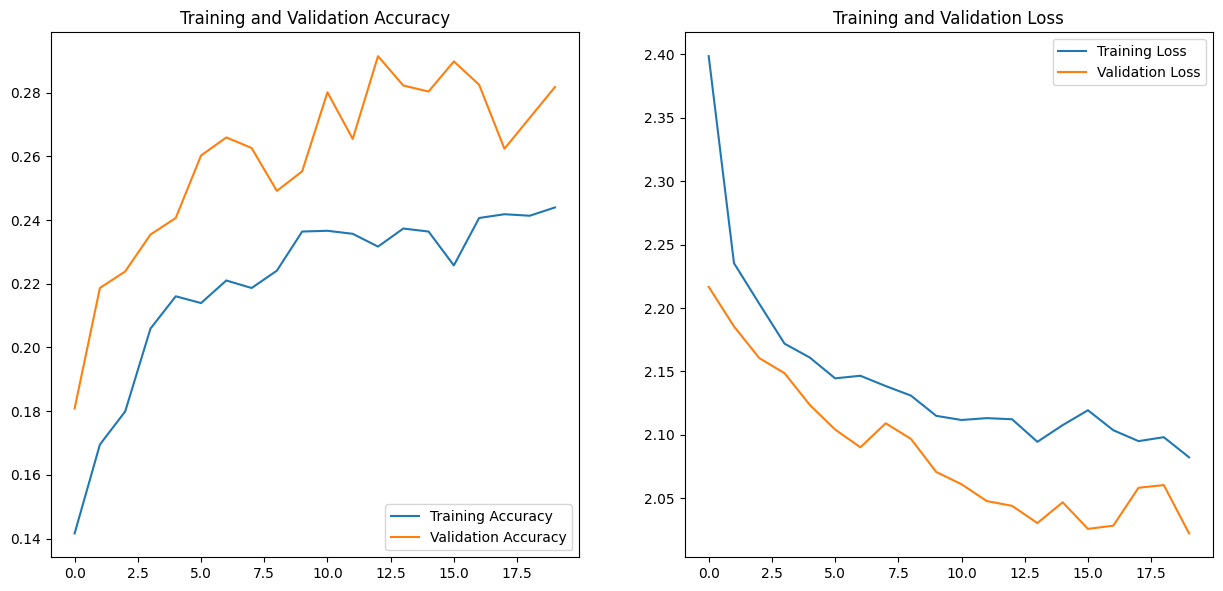

In [81]:
import matplotlib.pyplot as plt

# Get training history from the model you trained
history = history_resnet  # Use the appropriate history variable

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create dynamic range based on actual training epochs
epochs_range = range(len(acc))

# Create figure
plt.figure(figsize=(15, 15))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [83]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def predictor(model, test_gen):
  classes=list(test_gen.class_indices.keys())
  class_count=len(classes)
  preds=model.predict(test_gen, verbose=1)
  errors=0
  pred_indices=[]
  test_count = len(test_gen.labels) # Corrected to get the total number of test samples

  for i, p in enumerate(preds): # Corrected syntax in enumerate
    pred_index=np.argmax(p)
    pred_indices.append(pred_index)
    true_index= test_gen.labels[i]
    if pred_index != true_index:
      errors +=1 # Corrected syntax

  accuracy = (test_count - errors) * 100 / test_count # Corrected syntax

  ytrue = np.array(test_gen.labels, dtype='int') # Corrected syntax
  ypred = np.array(pred_indices, dtype='int') # Corrected syntax

  msg = f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f}' # Corrected f-string syntax and added missing test_count
  print(msg)

  cm = confusion_matrix(ytrue, ypred)
  # plot the confusion matrix
  plt.figure(figsize=(20, 20))
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False) # Corrected annot syntax
  plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
  plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  clr = classification_report(ytrue, ypred, target_names=classes, digits=4) # Corrected syntax for classification_report
  print("Classification Report:\n----------\n", clr) # Corrected syntax for print and added newline

  return

In [84]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [85]:
def get_model_prediction(image_path):
  img = load_img(image_path, target_size=(255, 255))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  predictions = model.predict(x, verbose=0)
  return labels[predictions.argmax()]

In [86]:
pred = []
for file in test_df['path'].values:
  pred.append(get_model_prediction(file))

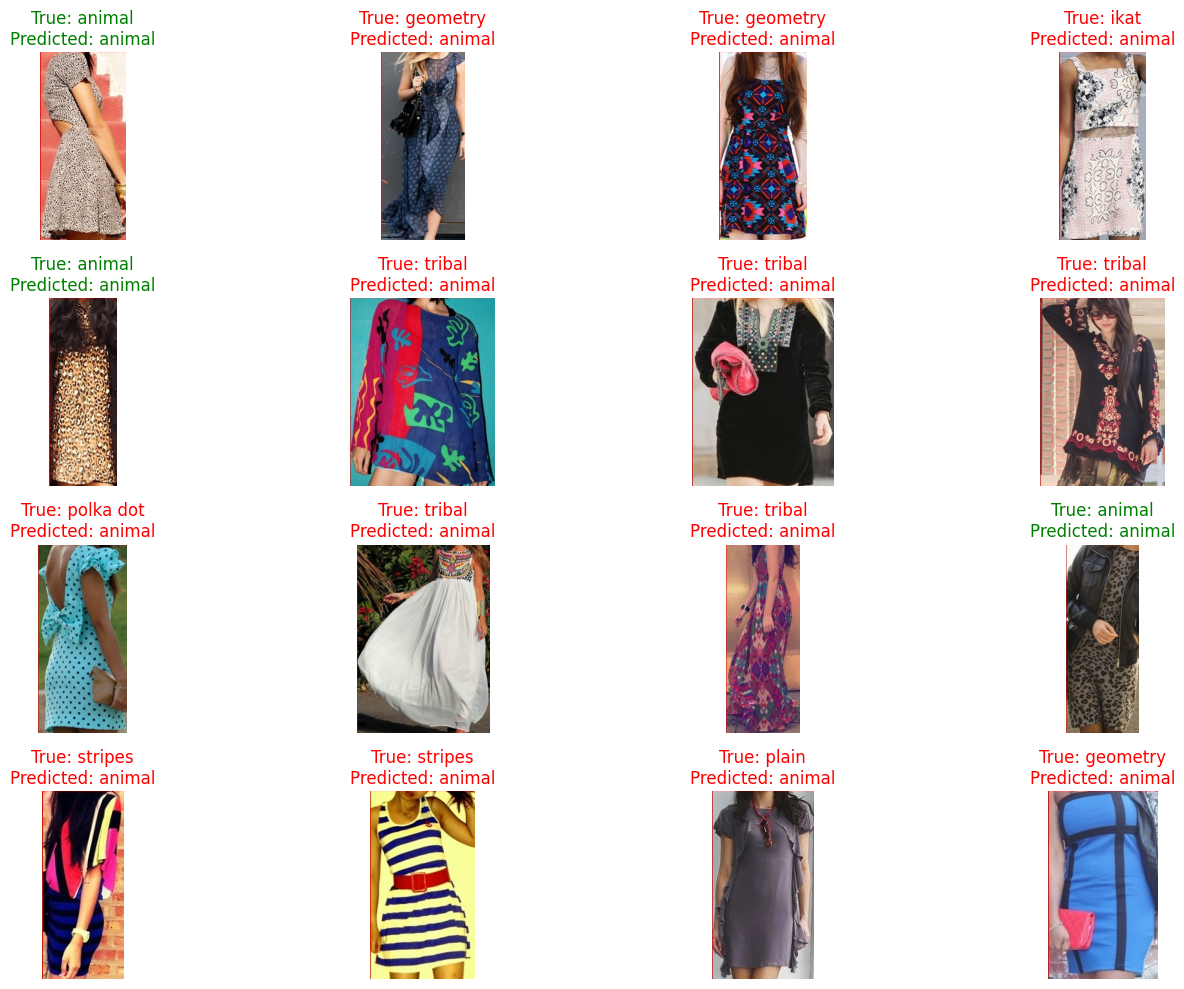

In [88]:
fig, axes = plt.subplots (nrows=4, ncols=4, figsize=(15, 10))
random_index = np.random.randint(0, len(test_df), 16) # Corrected len(test_gen) to len(test_df)
for i, ax in enumerate (axes.ravel()):
  img_path = test_df['path'].iloc[random_index[i]]
  ax.imshow(load_img(img_path))
  ax.axis('off')
  if test_df['label'].iloc[random_index[i]] == pred[random_index[i]]:
    color = "green" # Corrected syntax
  else:
    color = "red"
  ax.set_title(f"True: {test_df['label'].iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color) # Corrected f-string syntax
plt.tight_layout()
plt.show()

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')  # number of output classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', 'AUC']
)

# Print model summary
model.summary()

C:\Users\bpk12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4230)           │     2,169,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,566,086 (177.64 MB)

 Trainable params: 46,566,086 (177.64 MB)

 Non-trainable params: 0 (0.00 B)